In [ ]:
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Сегментация

In [ ]:
!unzip /content/drive/MyDrive/train_numbers.v2i.yolov8.zip

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8x-seg.pt")

In [ ]:
results = model.train(data="/content/data.yaml", epochs=100, imgsz=(512, 112))

In [ ]:
my_model = YOLO("/content/drive/MyDrive/best.pt")

In [ ]:
%cd runs

/content/runs


In [ ]:
res = my_model.predict("/content/вой (1).jpg")[0]


image 1/1 /content/вой (1).jpg: 224x512 2 numberss, 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 3.5ms postprocess per image at shape (1, 3, 224, 512)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
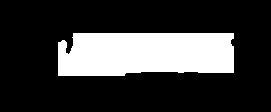

In [ ]:
img = np.copy(res[0].orig_img)
b_mask = np.zeros(img.shape[:2], np.uint8)
contour = res[0].masks.xy[0].astype(np.int32).reshape(-1, 1, 2)
# print(res[0].masks.xy[0].astype(np.int32).reshape(-1, 1, 2))
cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
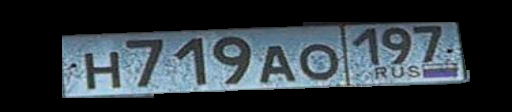

In [ ]:
mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
isolated = cv2.bitwise_and(mask3ch, img)
isolated

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [ 93, 114, 116],
        [ 54,  79,  83],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [102, 123, 125],
        [ 72,  97, 101],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [101, 122, 123],
        [ 87, 112, 116],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
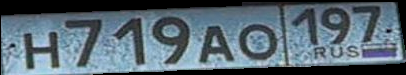

In [ ]:
iso_crop = isolated[y1:y2, x1:x2]
iso_crop

# Детекция цифр

In [ ]:
!unzip /content/drive/MyDrive/detect_num.v1i.yolov8.zip

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
results = model.train(data="data.yaml", epochs=100, imgsz=(512, 112))

In [ ]:
my_model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
res = my_model.predict("/content/final_result.png")


image 1/1 /content/final_result.png: 128x512 8 num_ws, 13.6ms
Speed: 0.6ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 128, 512)


In [ ]:
for result in res:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb
    result.show()
    result.save(filename="result.jpg")